In [1]:
import pandas as pd

# Load the Titanic dataset
train_df = pd.read_csv(r"C:\Users\Sanchit Dakle\OneDrive\Desktop\Excelar\Titanic_train.csv")
test_df = pd.read_csv(r"C:\Users\Sanchit Dakle\OneDrive\Desktop\Excelar\Titanic_test.csv")

# Display the first few rows of the training dataset
train_df.head(), train_df.info(), train_df.describe(), train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(   PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450   8.0500

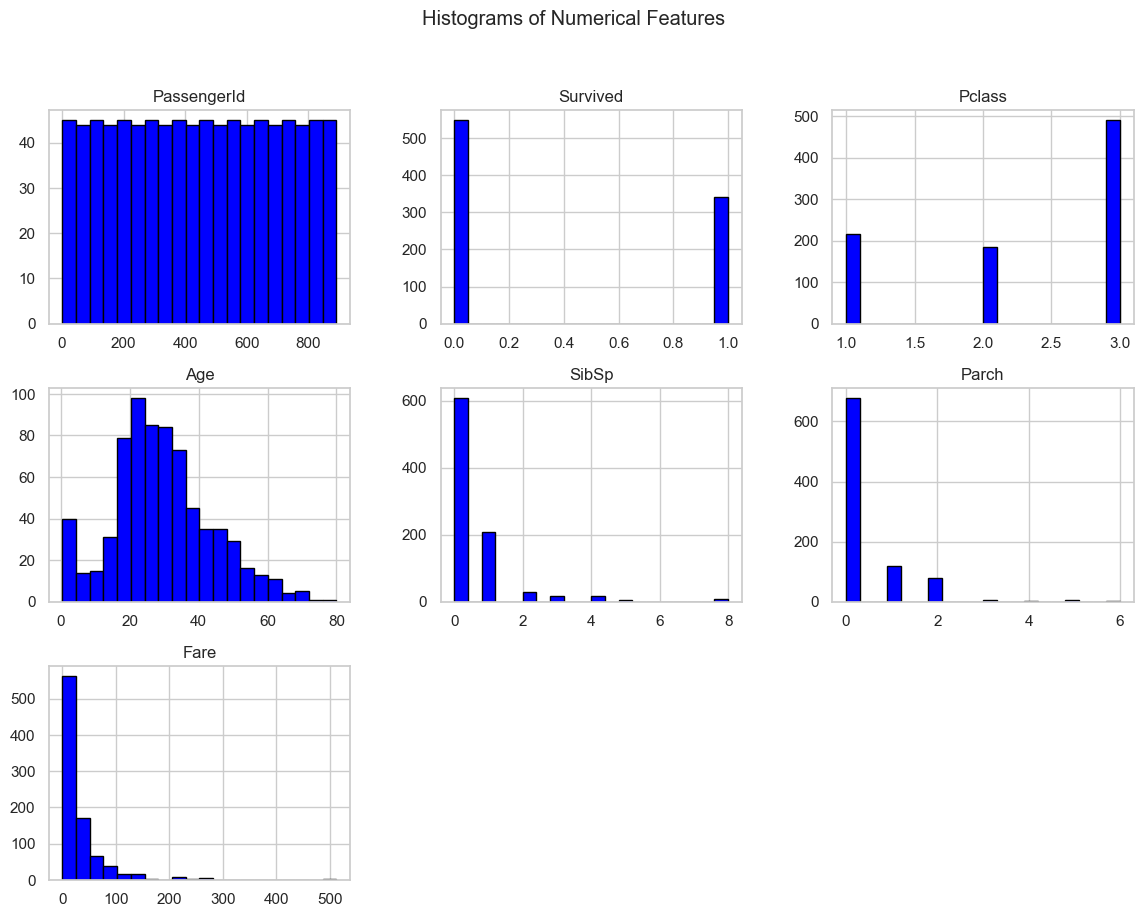

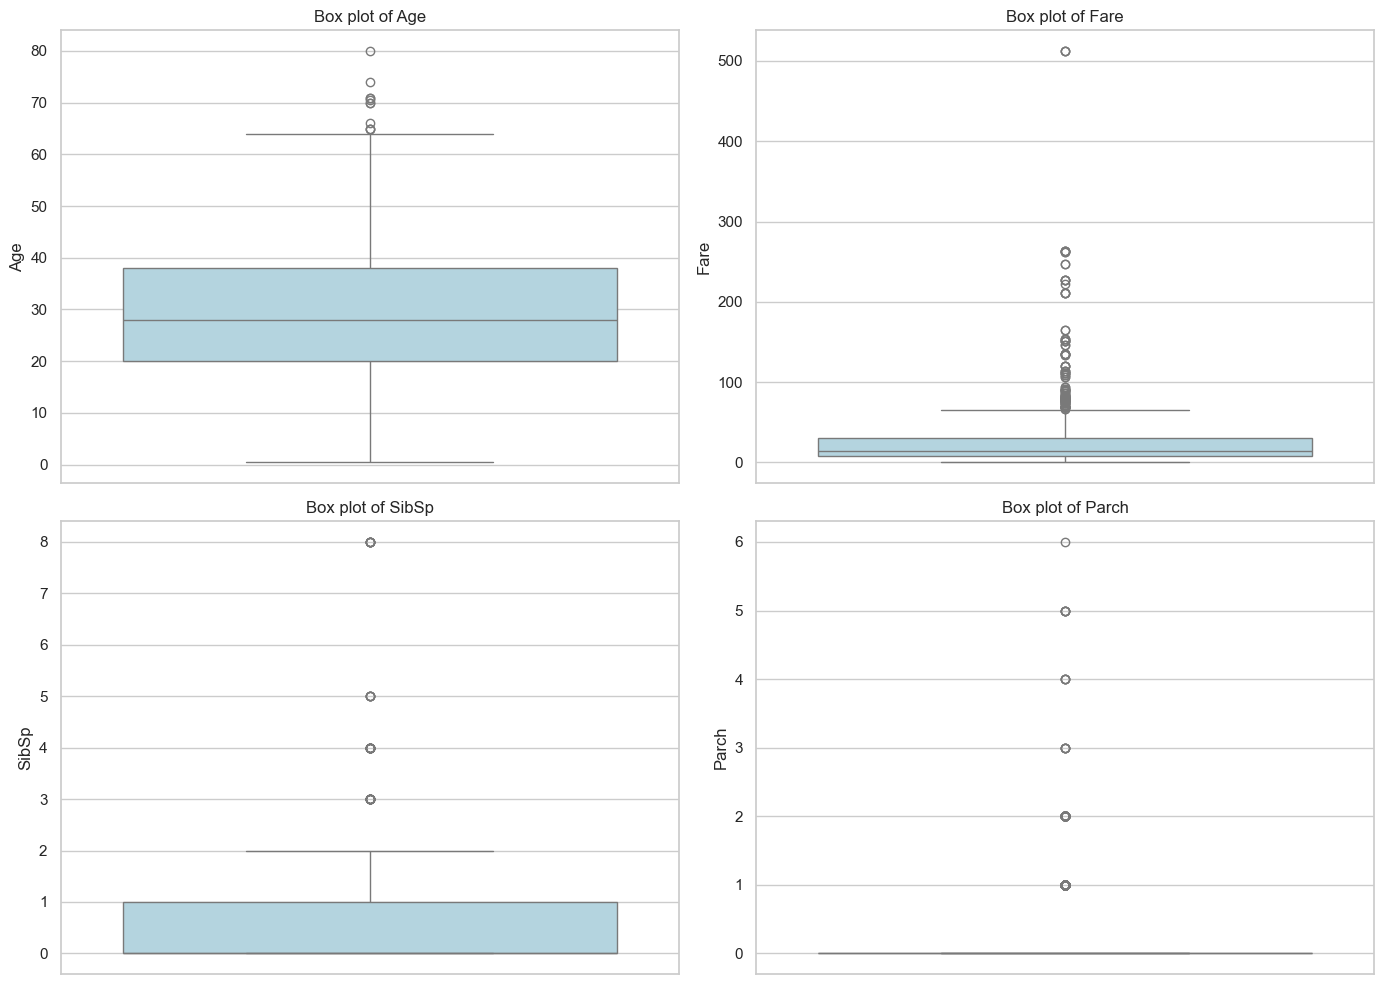

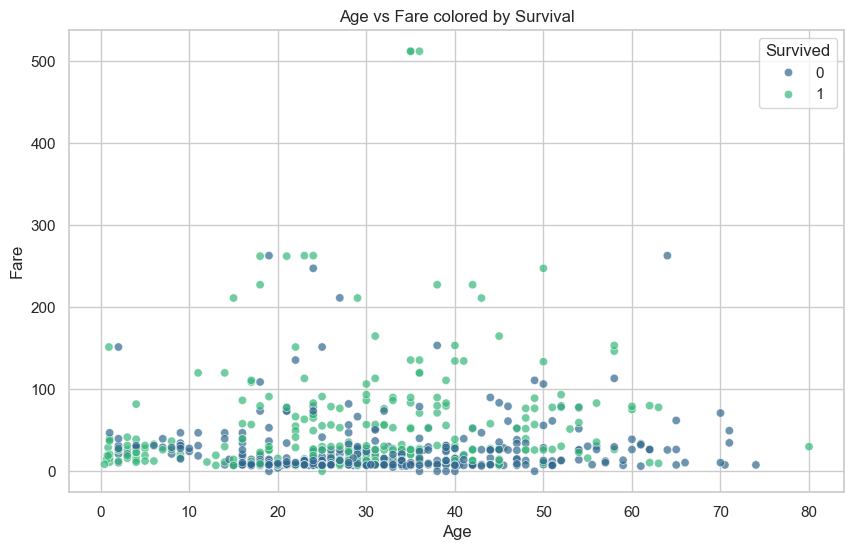

C:\Users\Sanchit Dakle\AppData\Local\Temp\ipykernel_18360\2877423770.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=train_df, palette='viridis')
C:\Users\Sanchit Dakle\AppData\Local\Temp\ipykernel_18360\2877423770.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=train_df, palette='viridis')
C:\Users\Sanchit Dakle\AppData\Local\Temp\ipykernel_18360\2877423770.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Survived', data=train_df, palette='viridis')


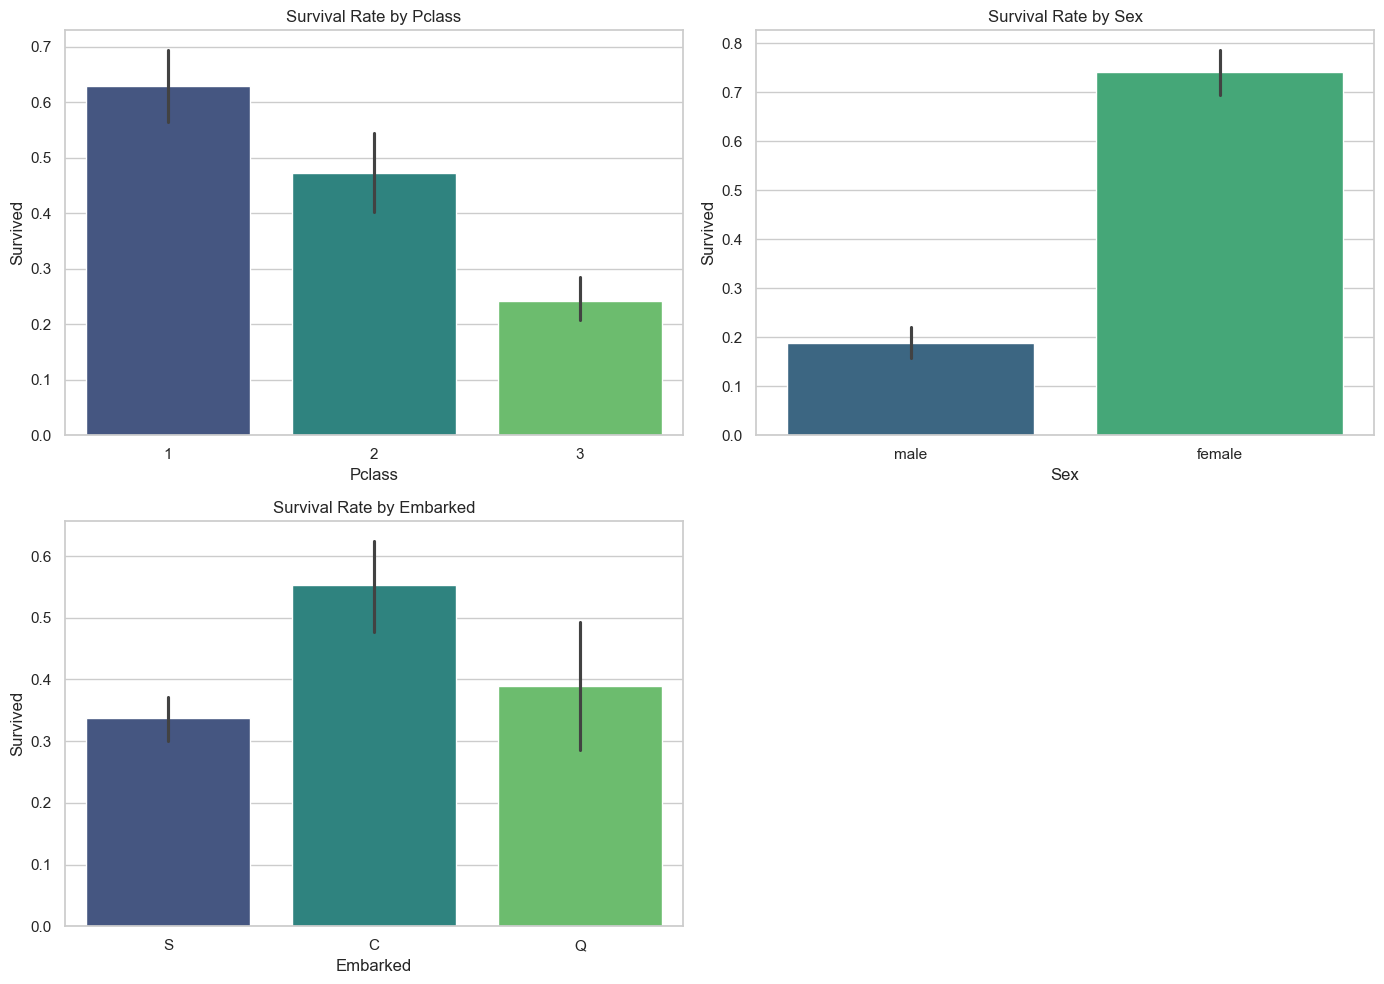

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Histograms for numerical features
train_df.hist(bins=20, figsize=(14, 10), color='blue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Box plots for numerical features
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Age', 'Fare', 'SibSp', 'Parch']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=col, data=train_df, color='lightblue')
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Scatter plot for Age vs Fare colored by Survival
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train_df, palette='viridis', alpha=0.7)
plt.title('Age vs Fare colored by Survival')
plt.show()

# Bar plots for categorical features vs Survival
plt.figure(figsize=(14, 10))
for i, col in enumerate(['Pclass', 'Sex', 'Embarked']):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=col, y='Survived', data=train_df, palette='viridis')
    plt.title(f'Survival Rate by {col}')
plt.tight_layout()
plt.show()


In [3]:
# Data Preprocessing

# Impute missing values
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Dropping the 'Cabin' column due to a high number of missing values
train_df.drop(columns=['Cabin'], inplace=True)

# Encode categorical variables using one-hot encoding
train_df_encoded = pd.get_dummies(train_df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop columns that are not useful for modeling
train_df_encoded.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

# Display the first few rows of the preprocessed data
train_df_encoded.head()


C:\Users\Sanchit Dakle\AppData\Local\Temp\ipykernel_18360\684753880.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
C:\Users\Sanchit Dakle\AppData\Local\Temp\ipykernel_18360\684753880.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import lightgbm as lgb
import xgboost as xgb

# Define features and target variable
X = train_df_encoded.drop('Survived', axis=1)
y = train_df_encoded['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LightGBM and XGBoost models
lgb_model = lgb.LGBMClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# Train LightGBM model
lgb_model.fit(X_train, y_train)

# Train XGBoost model
xgb_model.fit(X_train, y_train)

# Predict using both models
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Evaluate the models
lgb_accuracy = accuracy_score(y_test, lgb_pred)
lgb_precision = precision_score(y_test, lgb_pred)
lgb_recall = recall_score(y_test, lgb_pred)
lgb_f1 = f1_score(y_test, lgb_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)

# Display the evaluation metrics
{
    'LightGBM': {
        'Accuracy': lgb_accuracy,
        'Precision': lgb_precision,
        'Recall': lgb_recall,
        'F1 Score': lgb_f1
    },
    'XGBoost': {
        'Accuracy': xgb_accuracy,
        'Precision': xgb_precision,
        'Recall': xgb_recall,
        'F1 Score': xgb_f1
    }
}


[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 195
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


{'LightGBM': {'Accuracy': 0.8268156424581006,
  'Precision': 0.7945205479452054,
  'Recall': 0.7837837837837838,
  'F1 Score': 0.7891156462585034},
 'XGBoost': {'Accuracy': 0.8212290502793296,
  'Precision': 0.8,
  'Recall': 0.7567567567567568,
  'F1 Score': 0.7777777777777778}}

In [5]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Evaluate LightGBM model using cross-validation
lgb_cv_scores = cross_val_score(lgb_model, X_train, y_train, cv=5, scoring='accuracy')
lgb_cv_mean = lgb_cv_scores.mean()

# Evaluate XGBoost model using cross-validation
xgb_cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
xgb_cv_mean = xgb_cv_scores.mean()

# Hyperparameter tuning using GridSearchCV for LightGBM
lgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=5, scoring='accuracy')
lgb_grid.fit(X_train, y_train)

# Hyperparameter tuning using GridSearchCV for XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='accuracy')
xgb_grid.fit(X_train, y_train)

# Best parameters and scores
lgb_best_params = lgb_grid.best_params_
xgb_best_params = xgb_grid.best_params_

# Evaluate the tuned models
lgb_tuned_pred = lgb_grid.predict(X_test)
xgb_tuned_pred = xgb_grid.predict(X_test)

lgb_tuned_accuracy = accuracy_score(y_test, lgb_tuned_pred)
lgb_tuned_precision = precision_score(y_test, lgb_tuned_pred)
lgb_tuned_recall = recall_score(y_test, lgb_tuned_pred)
lgb_tuned_f1 = f1_score(y_test, lgb_tuned_pred)

xgb_tuned_accuracy = accuracy_score(y_test, xgb_tuned_pred)
xgb_tuned_precision = precision_score(y_test, xgb_tuned_pred)
xgb_tuned_recall = recall_score(y_test, xgb_tuned_pred)
xgb_tuned_f1 = f1_score(y_test, xgb_tuned_pred)

# Display the tuned evaluation metrics
{
    'LightGBM (Tuned)': {
        'Best Parameters': lgb_best_params,
        'Accuracy': lgb_tuned_accuracy,
        'Precision': lgb_tuned_precision,
        'Recall': lgb_tuned_recall,
        'F1 Score': lgb_tuned_f1
    },
    'XGBoost (Tuned)': {
        'Best Parameters': xgb_best_params,
        'Accuracy': xgb_tuned_accuracy,
        'Precision': xgb_tuned_precision,
        'Recall': xgb_tuned_recall,
        'F1 Score': xgb_tuned_f1
    }
}


[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


{'LightGBM (Tuned)': {'Best Parameters': {'learning_rate': 0.1,
   'max_depth': 3,
   'n_estimators': 50},
  'Accuracy': 0.8100558659217877,
  'Precision': 0.8125,
  'Recall': 0.7027027027027027,
  'F1 Score': 0.7536231884057971},
 'XGBoost (Tuned)': {'Best Parameters': {'learning_rate': 0.2,
   'max_depth': 3,
   'n_estimators': 50},
  'Accuracy': 0.8212290502793296,
  'Precision': 0.8387096774193549,
  'Recall': 0.7027027027027027,
  'F1 Score': 0.7647058823529411}}